In [4]:
%run "! DEFAULT PLOT THINGIES.ipynb"
%run "../! DEFAULT PLOT THINGIES.ipynb"

from __future__ import division
import cdf

<IPython.core.display.Javascript object>

Current working directory is now c:\users\deen\dropbox\phd rearrangements\thesis\notebooks\biax-dx-dy-kurtosis
Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


<IPython.core.display.Javascript object>

Current working directory is now c:\users\deen\dropbox\phd rearrangements\thesis\notebooks\biax-dx-dy-kurtosis
Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [3]:
tracked_measurements = []

for measurement in all_biax_measurements:
    _, name = os.path.split(measurement['path'])
    
    trackdata = glob.glob('u:/particle track data/%s.npz' % name)
    if not trackdata:
        continue
    
    measurement['trackdata'] = trackdata[0]
    tracked_measurements.append(measurement)

# voor deze set:
px_per_tick = 0.0008251
mm_per_px = 4.95e-5 / px_per_tick
print mm_per_px

0.0599927281542


In [5]:
zeroB = 755.5
zeroCD = 947.4
px_per_tick = 0.0008251
x0 = 147
y0 = 913

px_per_mm = px_per_tick / 4.95e-5 # mm/tick
print px_per_mm, "px per mm"

def get_data(position_data, particle_data, affine_corrected):
    ## WAAR HAAL IK DEZE INFO HANDIG VANDAAN, YO

    position_data = np.loadtxt(position_data)
    fps = 1/np.mean(np.diff(position_data[:,0]))
    
    particle_data = np.load(particle_data)
    
    X = particle_data["X"]
    Y = particle_data["Y"]
    r = particle_data["r"]
    
    Bticks = position_data[:,2]
    CDticks = position_data[:,3]

    Bpos = zeroB + Bticks*px_per_tick
    CDpos = zeroCD + CDticks*px_per_tick

    if affine_corrected:
        X = (X-x0) / CDpos[:,np.newaxis]
        Y = (y0-Y) / Bpos[:,np.newaxis]
    
    #else:
    #    X = (X-x0) / px_per_tick * 4.95e-5 # mm/tick
    #    Y = - ((Y-y0) / px_per_tick * 4.95e-5) # mm/tick
        
    return X,Y,r,CDpos,Bpos

16.6686868687 px per mm


In [6]:
datasets = {}

for measurement in tracked_measurements:
    phi = np.round(measurement['phi'], 2)
    #if measurement['shear_rate'] > 1e-4:
    #    continue
    #if phi not in [0.85, 0.9, 0.95, 1.0, 1.05, 1.10, 1.15, 1.20, 1.25, 1.3, 1.35, 1.4] or measurement['shear_rate'] > 1e-4:
    #    continue

    #print measurement['phi'], measurement['shear_rate'], measurement['path']
    X,Y,r,lXpx,lYpx = get_data(measurement['path'] + "/position.csv", measurement['trackdata'], False)
    bigcrop_trackdata = measurement['trackdata'].replace('track data/', 'track data/bigcrop/')
    #lcX,lcY,_,_,_ = get_data(measurement['path'] + "/position.csv", bigcrop_trackdata, False)
    acX,acY,_,_,_ = get_data(measurement['path'] + "/position.csv", measurement['trackdata'], True)

    particle = np.nanargmin(  ((np.mean(acX, axis=0) - 0.5)**2 + (np.mean(acY, axis=0) - 0.5)**2))
    
    gammadot =  measurement['shear_rate']
    datasets[(phi,gammadot)] = {#'Xpx': X, 'Ypx': Y, 'rpx': r,
#                     'lcX': lcX, 'lcY': lcY,
                     'acX': acX, 'acY': acY,
                     #'particle': particle,
                     #'lXpx': lXpx, 'lYpx': lYpx,
    }

In [7]:
for (phi,gammadot),dataset in sorted(datasets.items(), key=lambda x: [x[0][1], x[0][0]]):
    print phi, gammadot

0.8 3e-05
0.81 3e-05
0.82 3e-05
0.85 3e-05
0.86 3e-05
0.87 3e-05
0.9 3e-05
0.91 3e-05
0.92 3e-05
0.95 3e-05
0.96 3e-05
0.97 3e-05
1.0 3e-05
1.05 3e-05
1.1 3e-05
1.25 3e-05
1.3 3e-05
1.35 3e-05
0.8 0.0003
0.81 0.0003
0.82 0.0003
0.83 0.0003
0.84 0.0003
0.85 0.0003
0.86 0.0003
0.87 0.0003
0.88 0.0003
0.89 0.0003
0.9 0.0003
0.91 0.0003
0.92 0.0003
0.93 0.0003
0.94 0.0003
0.95 0.0003


\includegraphics{notebooks/biax-dx-dy-kurtosis/deltax-pdf.pdf}


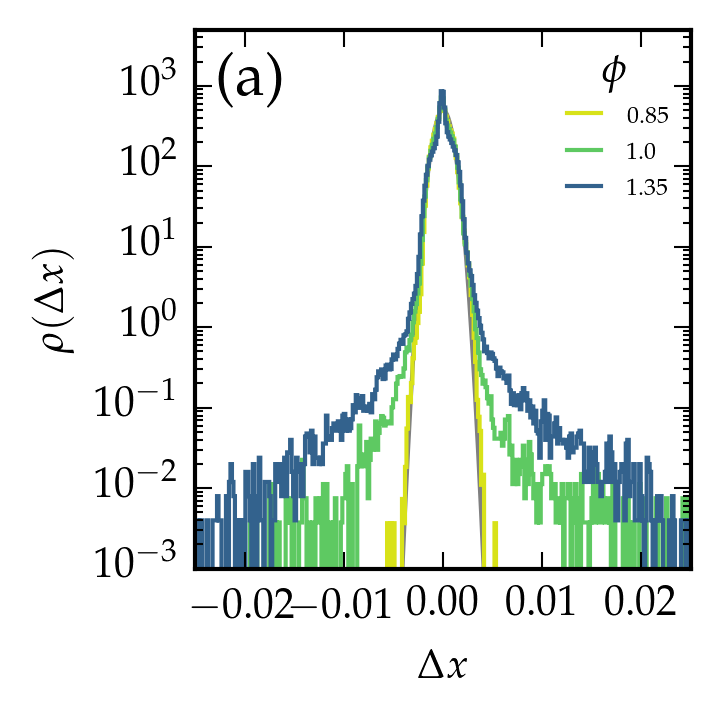

In [42]:
import scipy.stats

dt = 10

halffig()

factor = 0.0008
bins = np.linspace(-0.03, 0.03, 400)
plt.plot(bins, scipy.stats.norm.pdf(bins, loc=0, scale=factor), lw=1, color='gray', zorder=-10)

for (phi,gammadot),dataset in sorted(datasets.items()):
    if phi not in [0.85, 1, 1.35] or gammadot > 1e-4:
        continue

    dx = dataset['acX'][dt:] - dataset['acX'][:-dt]
    dx = dx.flatten()

    plt.hist(dx,  bins=bins, histtype='step', log=True, normed=True, color=phi_cmap(phi_norm(phi)))
    plt.plot(-100,-100,label=str(phi),color=phi_cmap(phi_norm(phi)))

plt.semilogy()
plt.legend(loc='upper right', fontsize='xx-small', frameon=False, title=r"$\phi$")
plt.axis(xmin=-0.025, xmax=0.025, ymin=1e-3, ymax=5e3)

plt.xlabel(r"$\Delta x$")
plt.ylabel(r"$\rho(\Delta x)$")
    
subplotlabel('(a)')

plt.savefig('deltax-pdf.pdf')

0.86 3.36598994751
0.89 3.3263030676
1.25 119.5144304
0.81 3.18012196531
0.97 13.1703972459
1.35 103.762941797
0.92 3.56399935021
0.92 3.36676212416
0.88 3.31068377453
0.84 3.24983777688
0.85 3.25798406768
0.85 3.14794192891
0.91 5.22161069834
1.1 43.3423681536
0.96 12.6597476776
0.95 4.65077554437
0.8 3.21958324429
1.3 101.11272082
0.81 3.08131046475
0.83 3.28468992958
0.87 3.41137241803
0.91 3.37607414438
0.87 3.26827828321
0.82 3.04216623672
0.9 4.47115221147
0.82 3.17995030331
0.8 3.04458169289
0.94 3.64081806189
0.9 3.28187190162
0.86 3.25463766946
1.0 26.1597527514
1.05 35.3486352999
0.93 3.27004722471
0.95 3.74632521652
\includegraphics{notebooks/biax-dx-dy-kurtosis/kurtosis-vs-phi.pdf}


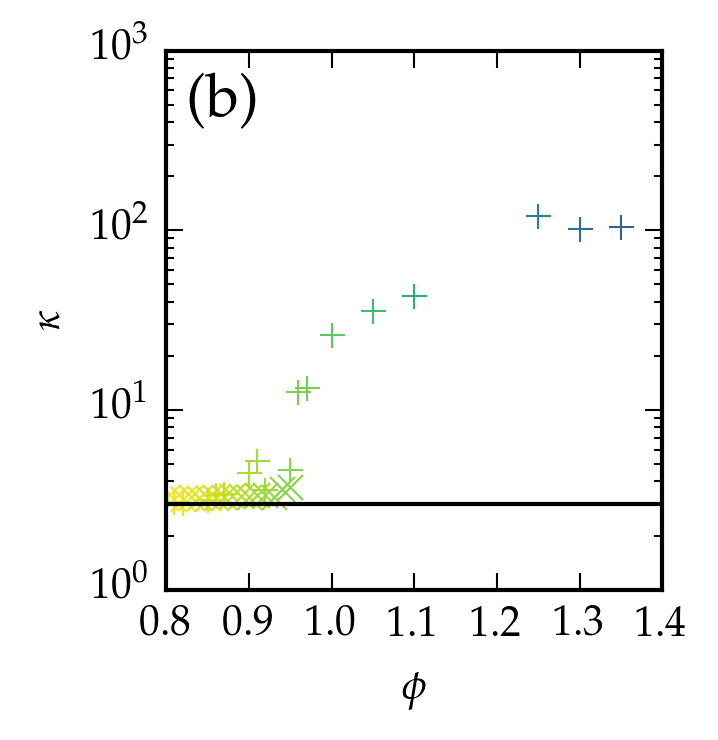

In [43]:
import scipy.stats
halffig()

dt = 10

for (phi,gammadot),dataset in datasets.items():
    dx = dataset['acX'][dt:] - dataset['acX'][:-dt]
    dx = dx[np.isfinite(dx)]

    kurt = np.mean((dx**4)) / (np.mean(dx**2))**2
    print phi,gammadot,kurt
    
    if gammadot > 1e-4:
        symbol = "x"
    else:
        symbol = "+"
    plt.plot(phi, kurt, symbol, color=phi_cmap(phi_norm(phi)))
        
    plt.semilogy()
#    plt.legend(loc='upper right', fontsize='xx-small', frameon=False, title=r"$\phi$")
#    plt.axis(xmin=-0.025, xmax=0.025, ymin=1e-3, ymax=5e3)
    
plt.axhline(3, color='black')
subplotlabel('(b)')

plt.xlabel(r"$\phi$")
plt.ylabel(r"$\kappa$")
    
plt.savefig('kurtosis-vs-phi.pdf')

In [46]:
phi

(0.85999999999999999, 3e-05)

\includegraphics{notebooks/biax-dx-dy-kurtosis/kurtosis-3-vs-phi.pdf}


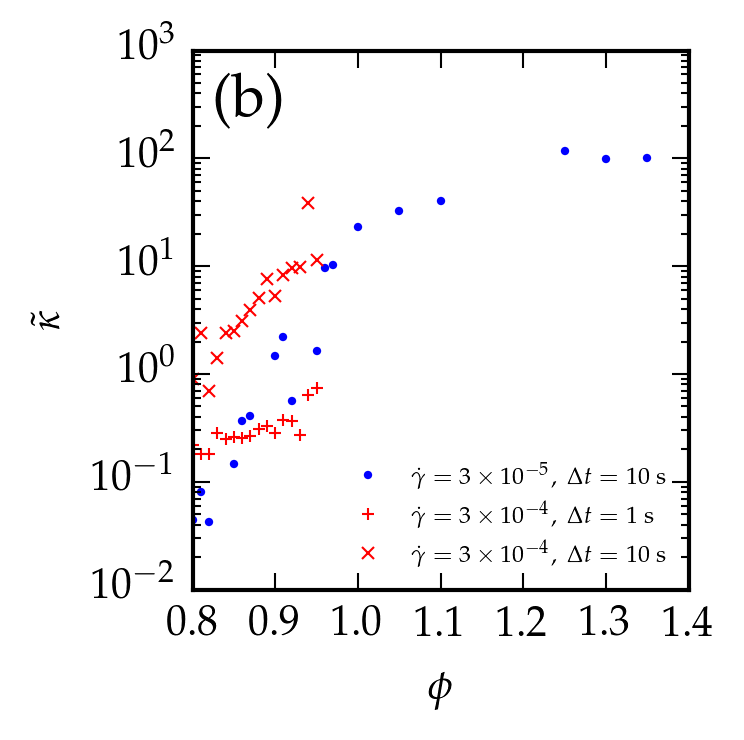

In [10]:
import scipy.stats
halffig()


for (phi,gammadot),dataset in datasets.items():
    if gammadot > 1e-4:
        symbols = ["+", "x"]
        colors = ['red', 'red']
        dts = [10,100] # samples
    else:
        symbols = ["."]
        colors = ['blue']
        dts = [10] # samples
    
    for (symbol,color,dt) in zip(symbols, colors, dts):
        dx = dataset['acX'][dt:] - dataset['acX'][:-dt]
        dx = dx[np.isfinite(dx)]

        kurt = np.mean((dx**4)) / (np.mean(dx**2))**2
        #print phi,gammadot,dt,kurt
        plt.plot(phi, kurt-3, symbol, color=color, ms=3) #, color=phi_cmap(phi_norm(phi)))
        
plt.semilogy()
#    plt.legend(loc='upper right', fontsize='xx-small', frameon=False, title=r"$\phi$")
#    plt.axis(xmin=-0.025, xmax=0.025, ymin=1e-3, ymax=5e3)
    
plt.axis(plt.axis())
plt.plot(-100, -100, "b.", label=r"$\dot\gamma=3\times 10^{-5},~\Delta t=10~\textrm{s}$")
plt.plot(-100, -100, "r+", label=r"$\dot\gamma=3\times 10^{-4},~\Delta t=1~\textrm{s}$")
plt.plot(-100, -100, "rx", label=r"$\dot\gamma=3\times 10^{-4},~\Delta t=10~\textrm{s}$")
    
subplotlabel('(b)')

plt.legend(loc='lower right', frameon=False, fontsize='xx-small', numpoints=1, markerscale=0.5)

plt.xlabel(r"$\phi$")
plt.ylabel(r"$\tilde\kappa$")
    
plt.savefig('kurtosis-3-vs-phi.pdf')